In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [32]:
n = 15
x = 2*np.random.random_sample(n)-1
x

array([ 0.60028027, -0.24777567, -0.69217525,  0.88913809, -0.73698097,
        0.96280174, -0.44767759, -0.90735336, -0.60547872, -0.73394193,
        0.17358695, -0.64888494, -0.44097384,  0.62173335, -0.2023476 ])

# Question 2

In [33]:
def g(x):
    return 1.5*x**3 -  x**2 - .75*x + 1 
y = g(x) + .05*np.random.randn(n)
y

array([ 0.6169003 ,  1.0556685 ,  0.51349975,  0.57793613,  0.28946429,
        0.78321463,  0.97603718, -0.25353126,  0.79112915,  0.36884577,
        0.82396406,  0.57049432,  1.1084226 ,  0.52681422,  1.13011644])

# Question 3

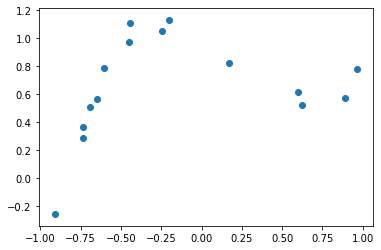

In [34]:
plt.scatter(x,y)
plt.show()

# Question 4

In [35]:
n_test = 30
x_test = 2*np.random.random_sample(n_test)-1
y_test = g(x_test) + .05*np.random.randn(n_test)

# Question 5

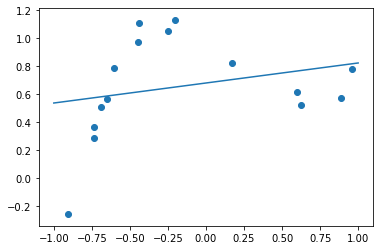

In [36]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()

X = x[:,np.newaxis]
X_test = x_test[:,np.newaxis]

f.fit(X,y)

xplot = np.linspace(-1,1,500).reshape(-1,1)
plt.scatter(x,y)
plt.plot(xplot,f.predict(xplot))
plt.show()

# Question 6

In [37]:
print("Erreur moyenne d'apprentissage :", sum((y-f.predict(X))**2)/n)
print("Erreur moyenne de test :", sum((y_test-f.predict(X_test))**2)/n_test)

Erreur moyenne d'apprentissage : 0.11547860978118021
Erreur moyenne de test : 0.1752671341770697


# Question 7

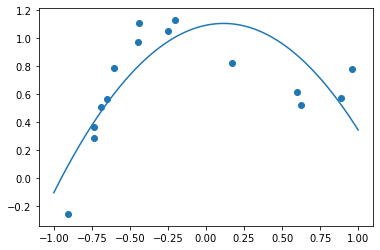

Erreur moyenne d'apprentissage : 0.04752239829513204
Erreur moyenne de test : 0.07406072955304625


In [38]:
from sklearn.preprocessing import PolynomialFeatures
psi = PolynomialFeatures(2,include_bias=False).fit_transform

f = LinearRegression().fit(psi(X),y)

plt.scatter(x,y)
plt.plot(xplot,f.predict(psi(xplot)))
plt.show()

print("Erreur moyenne d'apprentissage :", sum((y-f.predict(psi(X)))**2)/n)
print("Erreur moyenne de test :", sum((y_test-f.predict(psi(X_test)))**2)/n_test)

On observe une nette amélioration par rapport à la regression linéaire

# Question 8

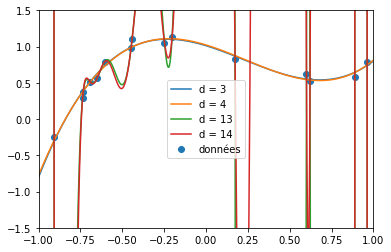

1.0130816689938449
[-0.70245578 -1.01328619  1.50423963]


In [39]:
def reg_poly(d):
    psi = PolynomialFeatures(d,include_bias=False).fit_transform
    return LinearRegression().fit(psi(X),y), psi

plt.scatter(x,y)
poly = {} 
psi = {}
for d in [3,4,13,14]:
    poly[d], psi[d] = reg_poly(d)
    plt.plot(xplot,poly[d].predict(psi[d](xplot)))
plt.axis([-1, 1, -1.5, 1.5])
plt.legend(['d = 3', 'd = 4', 'd = 13', 'd = 14','données'])
plt.show()

print(poly[3].intercept_)
print(poly[3].coef_)

Pour n=3, ces coefficients sont similaires à ceux de la fonction g
Pour n=14, il existe un polynôme qui passe par chacun des 15 points (polynôme d'interpolation de Lagrange). Ce polynôme minimise évidemment le risque empirique, c'est donc celui donné par la minimisation du risque empirique.

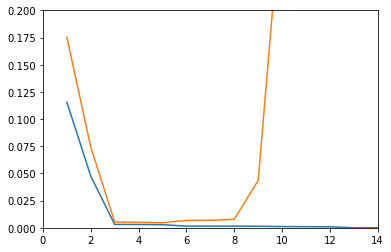

In [40]:
mean_train_error = []
mean_test_error = []
d_max = 14 
for d in range(1,d_max+1):
    f, psi = reg_poly(d)
    mean_train_error.append(sum((f.predict(psi(X))-y)**2)/n)
    mean_test_error.append(sum((f.predict(psi(X_test))-y_test)**2)/n_test)

plt.plot(range(1,d_max+1),mean_train_error)
plt.plot(range(1,d_max+1),mean_test_error)
plt.axis([0, d_max, 0, .2])
plt.show()

Plus n est élevé, plus les polyômes obtenus sont complexes et plus l'erreur d'apprentissage est faible.

L'erreur de test décroît d'abord. Puis, lorsque n grand, il croît: il y a alors sur-apprentissage. La grande complexité des polynôme permet de mieux coller aux points d'apprentissage, mais ne permet pas une bonne généralisation à de nouveaux points.

# Question 9

In [41]:
from sklearn.linear_model import Lasso

def reg_poly_lasso(d, alpha=1):
    psi = PolynomialFeatures(d,include_bias=False).fit_transform
    return Lasso(alpha).fit(psi(X),y), psi

Coefficients du polynôme : [-0.7353042  -0.28508766  1.49039075 -1.5142657   0.34237866 -0.03091879
 -0.07329929  0.35702837 -0.19049313  0.41718921 -0.19558159  0.3426436
 -0.14653267  0.25089905]
Coefficients du polynôme : [-0.7351661  -0.2985041   1.51196715 -1.4866236   0.25483102  0.00658489
  0.          0.24562775 -0.14844646  0.44519831 -0.23154876  0.38228362
 -0.16230992  0.2442946 ]
Coefficients du polynôme : [-0.73760527 -0.44811162  1.61855084 -1.1561014  -0.         -0.
 -0.          0.         -0.07324154  0.48891909 -0.12054082  0.48740771
 -0.11246564  0.06468657]
Coefficients du polynôme : [-0.64235151 -1.03179179  1.39809509 -0.          0.         -0.
  0.          0.          0.          0.          0.          0.
  0.          0.08538575]
Coefficients du polynôme : [-0.0524445  -0.91336141  0.         -0.          0.67681142 -0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.        ]
Coefficients du polynôme : [ 0. -0.  0. -0.  0

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010198702133755667, tolerance: 0.0001850167767969061
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005577653870772184, tolerance: 0.0001850167767969061
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004485616222001977, tolerance: 0.0001850167767969061
  model = cd_fast.enet_coordinate_descent(


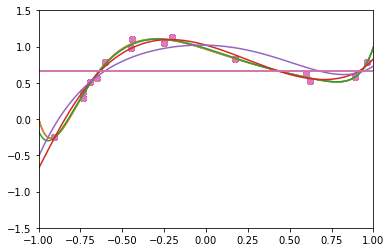

In [42]:
for alpha in [10**a for a in range(-6,1)]:
    f, psi = reg_poly_lasso(14,alpha)
    plt.scatter(x,y)
    plt.plot(xplot,f.predict(psi(xplot)))
    plt.axis([-1, 1, -1.5, 1.5])
    print('Coefficients du polynôme :',f.coef_)
plt.show()

Pour des valeurs de alpha assez grands, l'algorithme produit des polynômes ayant beaucoup de coefficients nuls et de faible degré. Cela limite la complexité des polynômes et donc le sur-apprentissage.

# Question 10

/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010198702133755667, tolerance: 0.0001850167767969061
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005577653870772184, tolerance: 0.0001850167767969061
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004485616222001977, tolerance: 0.0001850167767969061
  model = cd_fast.enet_coordinate_descent(


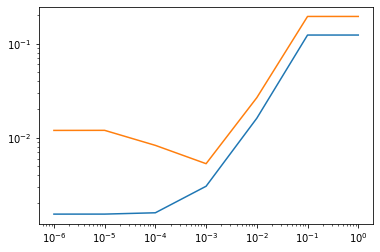

In [43]:
mean_train_error = []
mean_test_error = []
nonzero_coefficients = []
degree = []
alpha_range = [10**a for a in range(-6,1)]

for alpha in alpha_range:
    f, psi = reg_poly_lasso(14,alpha)
    mean_train_error.append(sum((f.predict(psi(X))-y)**2)/n)
    mean_test_error.append(sum((f.predict(psi(X_test))-y_test)**2)/n_test)

plt.plot(alpha_range,mean_train_error)
plt.plot(alpha_range,mean_test_error)
plt.xscale('log')
plt.yscale('log')
plt.show()

Le paramètre alpha joue un rôle similaire à d dans la question 8 (mais en sens inverse). 

Lorsque alpha décroît, les polynômes obtenus sont de plus en plus complexes, et l'erreur d'apprentissage diminue. Mais quand alpha est assez petit, l'erreur de test augmente à nouveau: il y a alors sur-apprentissage.